<a href="https://colab.research.google.com/github/GaYounKoh/4th-grade-NLP/blob/main/fall-semester/%EA%B8%B0%EB%A7%90%EA%B3%A0%EC%82%AC_%EC%83%98%ED%94%8C%EB%AC%B8%EC%A0%9C_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이름 : 고가연

학번 : 19016002

**시험중 외부 사이트는 [Keras](https://www.tensorflow.org/api_docs/python/tf/keras)만 참조 가능합니다.**

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

# 1. CNN

싸이킷런에 내장되어 있는 불향각 사진과 데이지 사진을 불러오겠습니다.

(427, 640, 3)


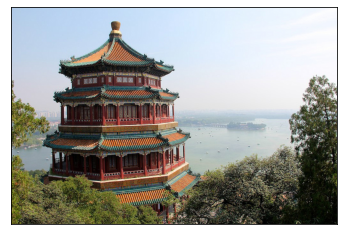

In [2]:
from sklearn.datasets import load_sample_image

china = load_sample_image('china.jpg')/255
print(china.shape)

plt.imshow(china)
plt.xticks([])
plt.yticks([])
plt.show()

(427, 640, 3)


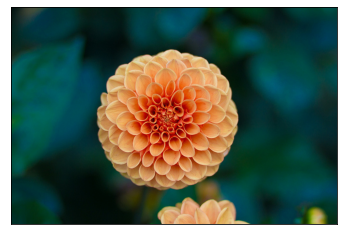

In [3]:
flower = load_sample_image('flower.jpg')/255
print(flower.shape)

plt.imshow(flower)
plt.xticks([])
plt.yticks([])
plt.show()

**1-1. 두 사진을 묶어서 N$\times$H$\times$W$\times$C 포맷의 4차원 텐서로 만드시오. shape을 출력하시오.** <br>

-> 진짜 묶기만 하면 됨.

N : 데이터 개수 <br>
H : Height <br>
W : Width <br>
C : Channel

In [4]:
images = np.array([china,flower]) # 배치 묶음
print(images.shape)

(2, 427, 640, 3)


**1-2. 수평 Sobel필터 $\begin{pmatrix}1&2&1\\0&0&0\\-1&-2&-1\end{pmatrix}$와 수직 Sobel필터 $\begin{pmatrix}1&0&-1\\2&0&-2\\1&0&-1\end{pmatrix}$를 생각하자. 수평 Sobel 필터 3개와 수직 Sobel 필터 3개를 각각 묶은 후 두 묶음을 다시 묶으시오. 텐서플로우의 필터 포맷인 FH$\times$FW$\times$C$\times$FN으로 축의 위치를 바꿔주시오. shape을 출력하시오.**

FH : Filter Height <br>
FW : Filter Width <br>
C : Channel <br>
FN : Filter Number (Filter 개수)

이 문제의 경우 .transpose를 사용하는 점, <br>
원래 shape 위치가 `FN*C*FH*FW` 였던 점을 기억해두자.

In [5]:
filter_h = [[1.,2.,1.],[0.,0.,0.],[-1.,-2.,-1.]] # filter horizontal 수평 sobel 필터
filters_h = np.array([filter_h,filter_h,filter_h]) # 필터 3개


filter_v = np.array([[1.,0.,-1.],[2.,0.,-2.],[1.,0.,-1.]]) # 수직 sobel 필터
filters_v = np.array([filter_v,filter_v,filter_v]) # 필터 3개

# 각 필터를 각 채널마다 적용
filters = np.array([filters_h, filters_v])
# print(filters.shape)
# print(filters)

filters = filters.transpose(2,3,1,0)
print(filters.shape)

(3, 3, 3, 2)


**1-3. 함수 [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d)를 이용해 스트라이드 1, 노 패딩으로 합성곱을 하시오. 행은 N, 열은 FN인 2$\times$2 바둑판 형태로 출력하시오.** <br>

output 포맷 : `N*OH*OW*FN`
- N : 데이터 개수 (china, flower)
- OH : Output Height
- OW : Output Width
- FN : 필터 개수 (sobel filter h/v)<br>
  => 기존 입력데이터의 C(Channel)는 사라지고, <br>
  Filter의 `FN`이 새로운 채널의 깊이가 됨.

(2, 425, 638, 2)


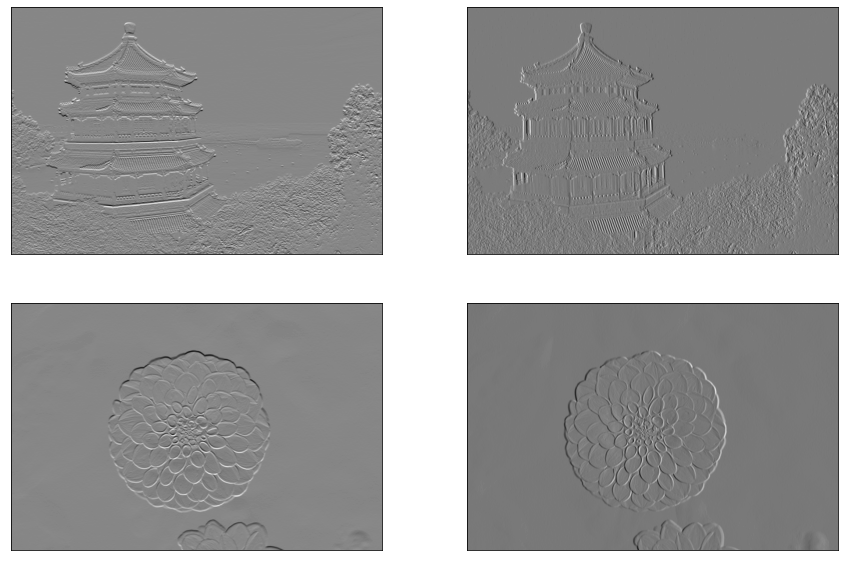

In [6]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding='VALID')
print(outputs.shape)

plt.figure(figsize=(15,10))
for i in (0,1):
    for j in (0,1):
        plt.subplot(2,2,2*i+j+1) # 0 - 1,2 | 1 - 3,4 그림 순서
        plt.imshow(outputs[i,:,:,j], cmap='gray')
        plt.xticks([])
        plt.yticks([])
plt.show()

**1-4. 함수 [tf.nn.max_pool2d](https://www.tensorflow.org/api_docs/python/tf/nn/max_pool2d)를 이용해 필터 크기 5, 스트라이드 5, 노 패딩으로 max pooling을 하시오. 두 이미지를 차례로 출력하시오.**

(2, 85, 128, 3)


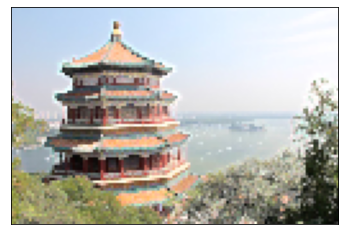

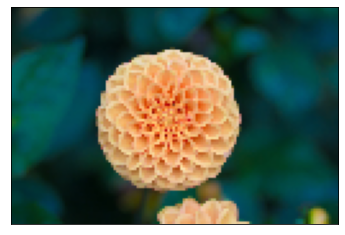

In [7]:
outputs = tf.nn.max_pool2d(images, ksize=5, strides=5, padding='VALID') # ksize : filter size | 스트라이드 -> strides | 노패딩 = 'VALID'
print(outputs.shape) # NHWC

for i in (0,1):
    plt.imshow(outputs[i,:,:,:]) # 데이터 개수
    plt.xticks([])
    plt.yticks([])
    plt.show()

클래스 [tf.keras.layers.Conv2d](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)와 [tf.keras.layers.MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)를 불러옵니다.

In [8]:
from keras.layers import Conv2D, MaxPool2D

**1-5. 랜덤하게 생성된 3$\times$3 필터 9개, 스트라이드 1, 패딩은 해상도가 유지되도록 잡아서 합성곱을 한후 Relu를 적용하시오. 여기에 필터 크기 2, 스트라이드 2, 노 패딩으로 max pooling을 하시오. 불향각, 데이지 각각에 대해 출력된 9개의 이미지를 3$\times$3 바둑판 형태로 출력하시오.**

In [9]:
output = Conv2D(filters=9,
                kernel_size=3,
                strides=1,
                padding='same',
                activation='relu')(images)
                # filters : 필터 개수 | kernel_size : 필터 해상도 3x3 |
                # activation : 합성함수, acivation func는 보통 dense, conv2d층에 옵션으로 넣어줌.
                # paddnig = 'same' : 해상도 유지
output = MaxPool2D(pool_size=2, strides = 2, padding = 'VALID')(output) # pool_size : max pooling에서 필터크기
# pool_size & stride크기 둘은 같은 수를 가짐.

print(output.shape) # 데이터 개수, 해상도, 해상도, 필터

(2, 213, 320, 9)


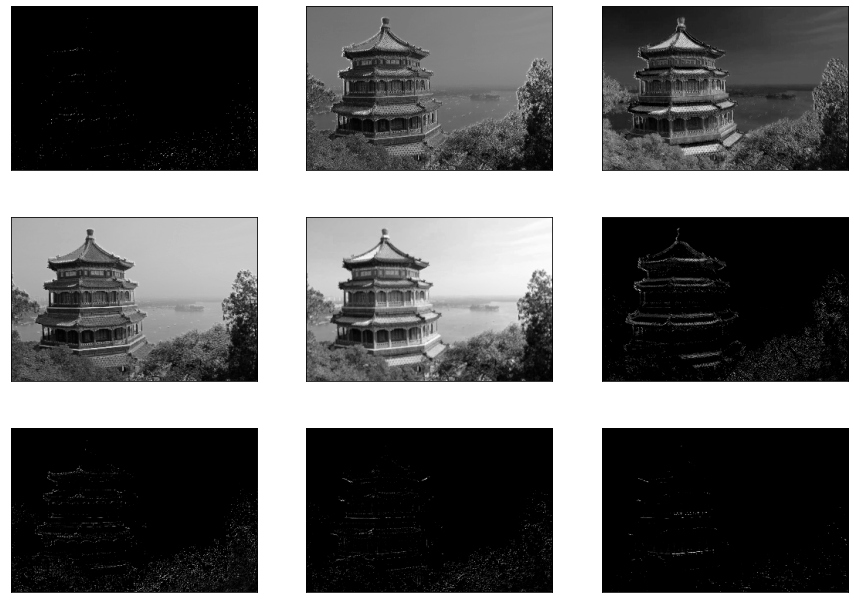

In [10]:
plt.figure(figsize=(15,11))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(output[0,:,:,i],cmap='gray')
plt.show()

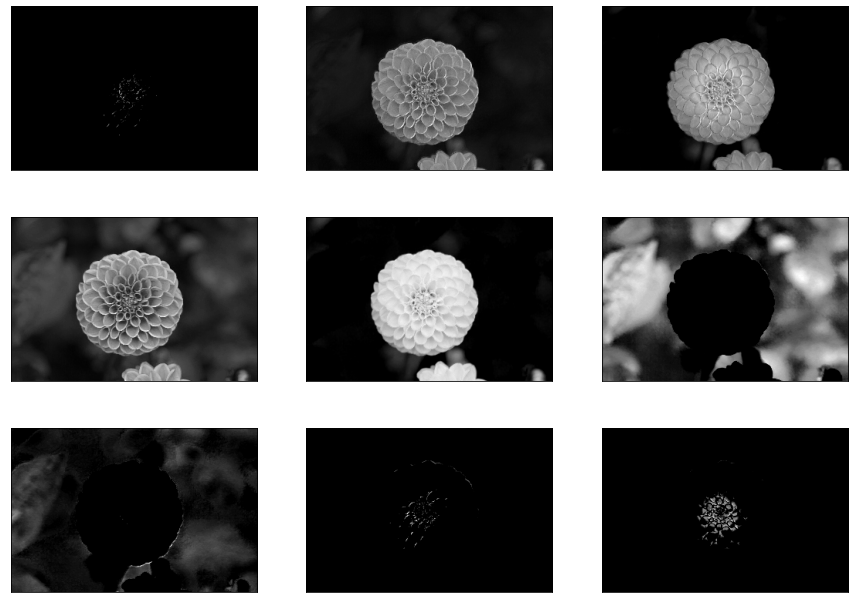

In [11]:
plt.figure(figsize=(15,11))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(output[1,:,:,i],cmap='gray')
plt.show()

CIFAR10 데이터셋을 불러온 후 32비트 실수형으로 바꿔주고 리스케일링 합니다.  
10개 라벨의 목록입니다.

In [12]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'sheep', 'truck']

170498071/170498071 [==============================] - 2s 0us/step


**1-6. 훈련 이미지와 라벨, 테스트 이미지와 라벨의 shape을 각각 출력하시오.**

In [13]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


**1-7. 훈련 데이터의 앞 25장을 5$\times$5 바둑판 형태로 출력하시오. 밑에는 영문 라벨을 표시하시오.**

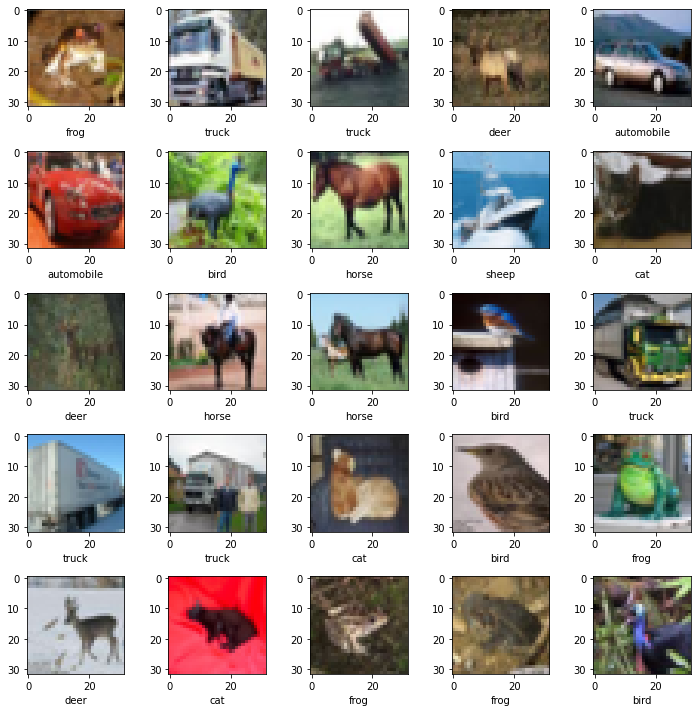

In [14]:
cnt = 0
_ = plt.figure(figsize = (10, 10))
for x in range(5):
    for y in range(5):
        _ = plt.subplot(5, 5, cnt+1)
        _ = plt.imshow(train_images[cnt])
        _ = plt.xlabel(class_names[train_labels[cnt][0]])
        cnt+=1
plt.tight_layout()

In [15]:
from keras.layers import Flatten, Dense

**1-8. 합성곱층 → Relu층 → max pooling층 → 합성곱층 → Relu층 → max pooling층 → 합성곱층 → Relu층 → flatten층 → Affine층 → softmax층의 구성을 가지는 CNN을 만들어 CIFAR10 데이터셋을 분류하려 한다. 합성곱층은 필터를 3$\times$3, 스트라이드 1, 노패딩으로 잡고 필터의 개수는 32, 64, 128개로 2배씩 늘려간다. max pooling층은 필터의 크기 2, 스트라이드 2, 노 패딩으로 잡는다. 함수형 API로 구성하시오.** <br>

함수형 API : ~~함수처럼 작성하여 불러다가 사용하는 걸 의미..?~~ <br>
-> model.add() (이건 sequentialAPI라고 함)가 아니라 바로 바로 쓰는 것을 의미 <br>
[참고](https://wikidocs.net/38861)

In [16]:
def build_model(input_shape, num_out): # num_out : 몇 진 분류 진행할 건지
    inputs = keras.Input(shape=input_shape)
    x = Conv2D(filters=32, kernel_size=3, activation="relu", padding = 'VALID')(inputs) # 합성곱 relu
    x = MaxPool2D(pool_size=2, strides = 2, padding = 'VALID')(x) # maxpooling
    x = Conv2D(filters=64, kernel_size=3, activation="relu", padding = 'VALID')(x) # 합성곱 relu
    x = MaxPool2D(pool_size=2, strides = 2, padding = 'VALID')(x) # maxpooling
    x = Conv2D(filters=128, kernel_size=3, activation="relu", padding = 'VALID')(x) # 합성곱 relu
    x = Flatten()(x) # affine 층으로 넘어가기 전에 flatten 해야함.
    outputs = Dense(num_out, activation="softmax")(x) # affine층, softmax층 -> 확률분포로 바꿔주고
    model = keras.Model(inputs=inputs, outputs=outputs)
    
    # model.compile(optimizer="rmsprop",
    #               loss="sparse_categorical_crossentropy",
    #               metrics="accuracy")
    
    return model

model = build_model(train_images.shape[1:],10) # 32,32,3 : cifar10 | 28,28,1 : mnist

**1-9. 신경망의 요약된 정보를 출력하시오.**

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 128)         73856 

**1-10. 옵티마이저는 RMSprop, 손실함수는 교차 엔트로피, 평가지표는 정확도로 학습설정을 하시오.**

In [18]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")

**1-11 배치크기는 64, 훈련회수는 5에퍽으로 훈련시키시오.**

In [19]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
782/782 [==============================] - 72s 91ms/step - loss: 1.6093 - accuracy: 0.4199
Epoch 2/5
782/782 [==============================] - 71s 91ms/step - loss: 1.2036 - accuracy: 0.5776
Epoch 3/5
782/782 [==============================] - 71s 91ms/step - loss: 1.0247 - accuracy: 0.6432
Epoch 4/5
782/782 [==============================] - 70s 89ms/step - loss: 0.9062 - accuracy: 0.6861
Epoch 5/5
782/782 [==============================] - 69s 88ms/step - loss: 0.8168 - accuracy: 0.7185


**1-12. 테스트 데이터로 평가하시오.**

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\n테스트 정확도: {test_acc:.3f}")

313/313 [==============================] - 5s 16ms/step - loss: 1.0670 - accuracy: 0.6367

테스트 정확도: 0.637


# 2. 입력 파이프라인 API

개와 고양이 이미지 데이터 셋을 다운받겠습니다.  
압축을 풀면 현재 작업디렉토리 밑에 cats_vs_dogs_small 디렉토리가 생성되고 그 밑에 train, validation, test 3개의 디렉토리가 생성됩니다.  
그 밑에 각각 cat과 dot 디렉토리가 생성되는데 그 안에 각각 고양이 사진과 강아지 사진이 있습니다.

In [21]:
!pip install --upgrade --no-cache-dir gdown

import gdown, zipfile, os
import matplotlib.image as img

if not os.path.isdir('cats_vs_dogs_small'):
    gdown.download(id='1z2WPTBUI-_Q2jZtcRtQL0Vxigh-z6dyW', output='cats_vs_dogs_small.zip')
    cats_vs_dogs_small = zipfile.ZipFile('cats_vs_dogs_small.zip')
    cats_vs_dogs_small.extractall()
    cats_vs_dogs_small.close()

print("train : "+os.listdir("./cats_vs_dogs_small/train/cat")[0]+" ~ "+os.listdir("./cats_vs_dogs_small/train/cat")[-1])
print("validation : "+os.listdir("./cats_vs_dogs_small/validation/cat")[0]+" ~ "+os.listdir("./cats_vs_dogs_small/validation/cat")[-1])
print("test : "+os.listdir("./cats_vs_dogs_small/test/cat")[0]+" ~ "+os.listdir("./cats_vs_dogs_small/test/cat")[-1])
print("train : "+os.listdir("./cats_vs_dogs_small/train/dog")[0]+" ~ "+os.listdir("./cats_vs_dogs_small/train/dog")[-1])
print("validation : "+os.listdir("./cats_vs_dogs_small/validation/dog")[0]+" ~ "+os.listdir("./cats_vs_dogs_small/validation/dog")[-1])
print("test : "+os.listdir("./cats_vs_dogs_small/test/dog")[0]+" ~ "+os.listdir("./cats_vs_dogs_small/test/dog")[-1])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


Downloading...
From: https://drive.google.com/uc?id=1z2WPTBUI-_Q2jZtcRtQL0Vxigh-z6dyW
To: /content/cats_vs_dogs_small.zip
100%|██████████| 114M/114M [00:02<00:00, 38.8MB/s]


train : cat.711.jpg ~ cat.125.jpg
validation : cat.1287.jpg ~ cat.1475.jpg
test : cat.2119.jpg ~ cat.1825.jpg
train : dog.935.jpg ~ dog.948.jpg
validation : dog.1454.jpg ~ dog.1362.jpg
test : dog.1689.jpg ~ dog.2365.jpg


**2-1. 고양이 첫 훈련 이미지 25장을 5$\times$5 바둑판 형태로 출력하시오.**

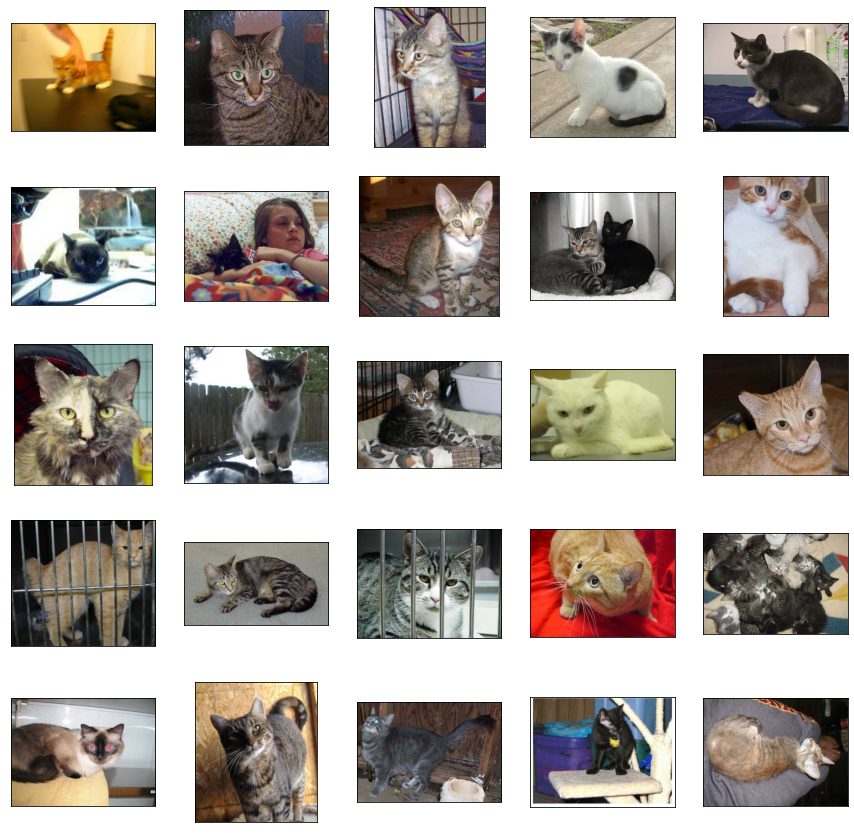

In [22]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    image_path = f'./cats_vs_dogs_small/train/cat/cat.{i}.jpg'
    image = img.imread(image_path)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [23]:
import pathlib
from tensorflow.keras.utils import image_dataset_from_directory

base_dir = pathlib.Path("cats_vs_dogs_small")

**2-2. [tf.keras.utils.image_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory)을 사용해서 디렉토리로부터 데이터를 읽어들여 `Dataset`을 만드시오. 해상도는 180$\times$180으로 통일하고 입력데이터를 랜덤하게 섞은후 32개의 배치단위로 묶으시오. 고양이 이미지는 0, 강아지 이미지는 1로 라벨을 붙이시오.**

In [24]:
train_dataset = image_dataset_from_directory(
    base_dir / "train",
    image_size = (180, 180),
    batch_size = 32)

validation_dataset = image_dataset_from_directory(
    base_dir / "validation",
    image_size = (180, 180),
    batch_size = 32)

test_dataset = image_dataset_from_directory(
    base_dir / "test",
    image_size = (180, 180),
    batch_size = 32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


**2-3. 첫번째 배치묶음의 라벨들을 출력하시오.**

`next(iterator)` 찍을 때마다 다음 배치로 넘어감.

In [25]:
iterator = iter(train_dataset)
batch_1 = next(iterator)
print(batch_1)

(<tf.Tensor: shape=(32, 180, 180, 3), dtype=float32, numpy=
array([[[[2.19133331e+02, 2.19133331e+02, 1.81133331e+02],
         [2.20000000e+02, 2.20000000e+02, 1.82000000e+02],
         [2.20133331e+02, 2.20133331e+02, 1.82133331e+02],
         ...,
         [2.11866791e+02, 2.11866791e+02, 1.75866791e+02],
         [2.04866669e+02, 2.04866669e+02, 1.68866669e+02],
         [1.98200043e+02, 1.98200043e+02, 1.64200043e+02]],

        [[2.20800003e+02, 2.20800003e+02, 1.82800003e+02],
         [2.20800003e+02, 2.20800003e+02, 1.82800003e+02],
         [2.21399994e+02, 2.21399994e+02, 1.83399994e+02],
         ...,
         [2.10333450e+02, 2.10333450e+02, 1.74333450e+02],
         [2.03600006e+02, 2.03600006e+02, 1.67600006e+02],
         [1.96933380e+02, 1.96933380e+02, 1.62933380e+02]],

        [[2.22666672e+02, 2.22666672e+02, 1.84666672e+02],
         [2.22666672e+02, 2.22666672e+02, 1.84666672e+02],
         [2.22666672e+02, 2.22666672e+02, 1.84666672e+02],
         ...,
         

# 3. 데이터 증강

In [ ]:
from keras.layers import RandomFlip, RandomRotation, RandomZoom

**3-1. 랜덤하게 좌우대칭, 랜덤하게 -0.1×360° ~ 0.1×360°만큼 회전, 상하로 랜덤하게 -20% ~ 20% 확대하는 데이터 증강층을 Sequential API로 구성하시오.**

**3-2. 첫번째 배치묶음의 첫번째 이미지를 출력하시오. 25번 증강을 한후 5$\times$5 바둑판 형태로 출력하시오.**

In [ ]:
from keras.layers import MaxPooling2D, Rescaling, Dropout

**3-3. 증강층 → rescaling층 → 합성곱층 → Relu층 → max pooling층 → 합성곱층 → Relu층 → max pooling층 → 합성곱층 → Relu층 → max pooling층 → 합성곱층 → Relu층 → max pooling층 → 합성곱층 → Relu층 → flatten층 → dropout층 → Affine층 → sigmoid층의 구성을 가지는 CNN을 만들어 개와 고양이 사진들을 분류하려 한다. 합성곱층은 필터를 3$\times$3, 스트라이드 1, 노패딩으로 잡고 필터의 개수는 32, 64, 128, 256, 256개로 늘려간다. max pooling층은 필터의 크기 2, 스트라이드 2, 노 패딩으로 잡는다. dropout ratio는 0.5로 잡는다. 함수형 API로 구성하시오.**

**3-4. 옵티마이저는 RMSprop, 손실함수는 교차 엔트로피, 평가지표는 정확도로 학습설정을 하시오.**

**3-5. 50에퍽동안 훈련시키시오. 검증 데이터로 모니터링 하시오.**

**3-6. 테스트 데이터로 평가하시오.**

# 4. VGG

VGG16 모델을 불러오겠습니다.  
1,000개의 라벨 목록도 만들었습니다.  
데이지 이미지를 리스케일링하지 않은 상태로 다시 불러옵니다.

In [ ]:
vgg16 = keras.applications.vgg16.VGG16()

if not os.path.isfile('VGG16_test.zip'):
    gdown.download(id='11LZAFSFVtDsdKdLcFR9E-MaDoar6C3R5', output='VGG16_test.zip')
    VGG16_test = zipfile.ZipFile('VGG16_test.zip')
    VGG16_test.extractall()
    VGG16_test.close()

with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
    
flower = load_sample_image('flower.jpg')

**4-1. VGG16 모델의 요약된 정보를 출력하시오.**

**4-2. [tf.image.resize](https://www.tensorflow.org/api_docs/python/tf/image/resize)를 사용해 데이지 이미지의 해상도를 VGG16의 입력 해상도에 맞추시오. [tf.keras.applications.vgg16.preprocess_input](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)을 사용해 VGG16에 맞는 데이터 전처리를 하시오. VGG16 모델이 예측하는 1,000차원 확률분포를 출력하시오.**

**4-3. 톱 5의 클래스 이름과 확률을 출력하시오.**

**4-4. 2위가 bee인 이유를 설명하시오.**

설명 : 

# 5. 전이학습

**5-1. VGG16 모델을 다시 불러오되 분류기를 잘라내시오. 입력 해상도를 180$\times$180으로 변경하고 파라미터를 동결하시오.**

**5-2. 데이터 증강 층(3-1) → 파라미터가 동결된 VGG16의 특성 추출기(5-1) → 이진 분류기 순으로 신경망을 구성하시오. 이진분류기는 flatten층 → Affine층 →  dropout층 → affine층 → sigmoid층의 구성을 가지도록 만들어 개와 고양이 사진들을 분류하려 한다. 이진 분류기의 은닉층의 뉴런수는 256, dropout ratio는 0.5로 잡는다. 함수형 API로 구성하시오.**

**5-3. 옵티마이저는 RMSprop, 손실함수는 교차 엔트로피, 평가지표는 정확도로 학습설정을 하시오.**

**5-4. 10에퍽동안 훈련시키시오. 검증 데이터로 모니터링 하시오.**

**5-5. 마지막 4개층의 동결을 해제하시오.**

**5-6. 옵티마이저는 RMSprop, 손실함수는 교차 엔트로피, 평가지표는 정확도로 학습설정을 하시오. RMSProp의 학습률은 $10^{-5}$으로 설정하시오.**

**5-7. 5에퍽동안 미세조정을하시오. 검증 데이터로 모니터링 하시오.**

**5-8. 테스트 데이터로 평가하시오.**